In [1]:
import numpy as np

### Generate X and Y

In [15]:
Y = np.random.normal(0,1,50)

In [17]:
X = np.exp(Y)

### Check distributions

In [4]:
%matplotlib inline

In [5]:
import seaborn as sns

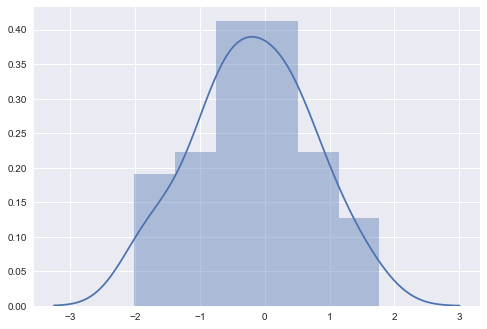

In [16]:
sns.distplot(Y)

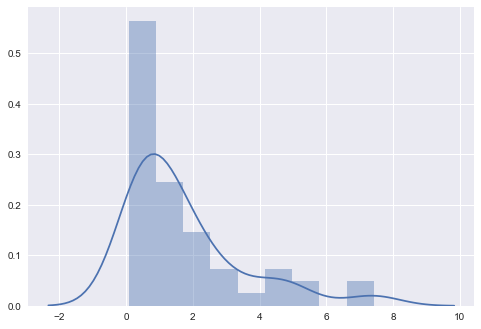

In [7]:
sns.distplot(X)

### Calculate skew

In [18]:
import scipy
import scipy.stats as sp

In [19]:
sp.skew(X)

1.9899660105233683

## Confidence intervals

### Normal method

Get B estimates of $\hat{T}$, calculate 

$ CI = T_n \pm z_{\alpha/2} \cdot \hat{se}_b $

In [21]:
# number of bootstrap samples
B = 1000
# sample size
s = 1000

In [22]:
estimates = []

for i in range(B):
    sample = np.random.choice(X, size=s)
    estimates.append(sp.skew(sample))

In [26]:
mu_hat = np.mean(estimates)

In [27]:
se_hat = np.std(estimates)

In [29]:
(mu_hat, mu_hat-1.96*se_hat, mu_hat+1.96*se_hat)

(1.9829891614960251, 1.8063552332784258, 2.1596230897136244)

Note: The normal method only works if $\hat{T}$ is normally distributed. We can check:

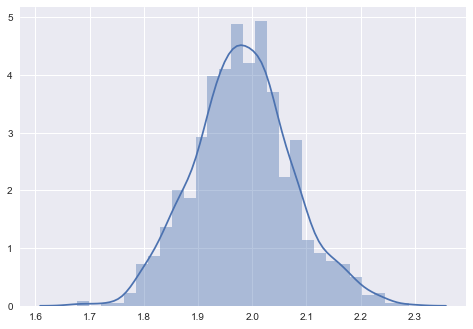

In [30]:
sns.distplot(estimates)

### Pivot method

The pivotal CI is given by:

$C_n = (\hat{a}, \hat{b})$

where:

$\hat{a} = 2 \hat{\theta}_n - \theta^*_{1-\alpha/2}$

$\hat{b} = 2 \hat{\theta}_n - \theta^*_{\alpha/2}$

where $\hat{\theta}_n$ is the sample mean and $\theta^*_{\alpha/2}$ is the ${\alpha/2}^{th}$ quantile.

In [33]:
theta_hat = np.mean(estimates)
theta_star_a = np.percentile(estimates, q=97.5)
theta_star_b = np.percentile(estimates, q=2.5)

In [34]:
(2*theta_hat - theta_star_a, 2*theta_hat - theta_star_b)

(1.796693978241314, 2.1575170872793867)

### Percentile intervals

$C_n = (\theta^*_{\alpha/2}, \theta^*_{1-\alpha/2})$

In [36]:
(theta_star_b, theta_star_a)

(1.8084612357126637, 2.1692843447507362)